# Universe Screener

* Testing first

In [1]:
import pandas as pd
import numpy as np
import glob
import pymysql
import matplotlib.pyplot as plt

In [75]:
connection = pymysql.connect(host='localhost',port=3306, db='INVESTAR',user='root',passwd='tlqkfdk2',autocommit=True)
cursor = connection.cursor()
#cursor.execute("SELECT VERSION();")
#result = cursor.fetchone()
#connection.close()

In [7]:
comps = pd.read_sql("SELECT * FROM company_info",connection)

In [8]:
comps

,code,company,last_update
0,000020,동화약품,2021-01-06
1,000040,KR모터스,2021-01-06
2,000050,경방,2021-01-06
3,000060,메리츠화재,2021-01-06
4,000070,삼양홀딩스,2021-01-06
...,...,...,...
2406,950160,코오롱티슈진,2021-01-06
2407,950170,JTC,2021-01-06
2408,950180,SNK,2021-01-06
2409,950190,미투젠,2021-01-06


In [5]:
cursor.execute("SELECT COUNT(*) FROM daily_price;")
rst = cursor.fetchone()

In [6]:
rst

(179808,)

In [76]:
cursor.execute("SELECT MIN(DATE) FROM daily_price;")
cursor.fetchone()

(datetime.date(2002, 7, 9),)

In [9]:
df = pd.read_sql("SELECT * FROM daily_price where code='000020'",connection)

In [12]:
sub = df.drop('CODE',axis=1)

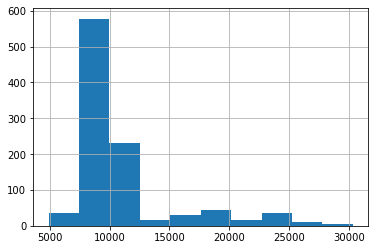

In [14]:
sub['OPEN'].hist()

In [16]:
sub1 = sub[['DATE','close']]

In [22]:
sub1.head()

,DATE,close
0,2016-12-08,7480
1,2016-12-09,7540
2,2016-12-12,7740
3,2016-12-13,7820
4,2016-12-14,7900


In [24]:
t1 = np.array([5,12,14])
t2 = np.array([2,3,7])

In [25]:
t1/t2

array([2.5, 4. , 2. ])

In [27]:
sub1.shift(1).head()

,DATE,close
0,NaN,NaN
1,2016-12-08,7480.0
2,2016-12-09,7540.0
3,2016-12-12,7740.0
4,2016-12-13,7820.0


In [33]:
tt = pd.DataFrame(np.array(sub1['close']) / np.array(sub1.shift(1)['close']) -1)

In [34]:
tt.head()

,0
0,NaN
1,0.008021
2,0.026525
3,0.010336
4,0.010230


In [35]:
tt.describe()

,0
count,999.000000
mean,0.001441
std,0.031682
min,-0.194719
25%,-0.012591
50%,0.000000
75%,0.012775
max,0.299559


In [41]:
s1 = pd.read_sql("SELECT * FROM daily_price where code='000070'",connection)

In [42]:
tt2 = pd.DataFrame(np.array(s1['close']) / np.array(s1.shift(1)['close']) -1)

In [43]:
tt2.describe()

,0
count,999.000000
mean,-0.000163
std,0.025472
min,-0.164948
25%,-0.012510
50%,0.000000
75%,0.010856
max,0.298762


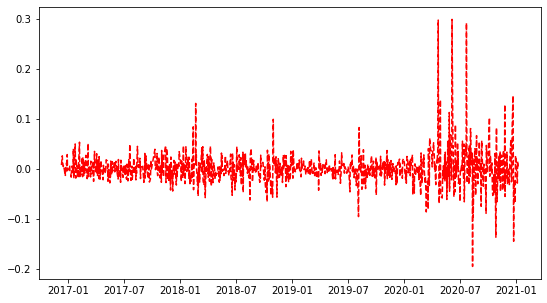

In [51]:
plt.figure(figsize=(9,5))
plt.plot(sub1.DATE, tt[0], 'r--', label='동화약품')
#plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
#plt.grid(True)
#plt.legend(loc='best')
plt.show()

In [55]:
tt1 = 

,DATE,OPEN,high,low,close,diff,volume
0,2016-12-08,7620,7620,7450,7480,10,37690
1,2016-12-09,7530,7580,7460,7540,60,39179
2,2016-12-12,7570,7810,7540,7740,200,54245
3,2016-12-13,7780,7890,7710,7820,80,125368
4,2016-12-14,7880,7970,7730,7900,80,93743
...,...,...,...,...,...,...,...
995,2020-12-29,18750,19400,18750,19150,500,471430
996,2020-12-30,19100,19800,18800,19650,500,623218
997,2021-01-04,19750,19900,18850,19100,550,719076
998,2021-01-05,19000,19500,18650,19400,300,660993


---

### DART FSS 

In [2]:
import dart_fss as dart

In [3]:
api_key = '34498c52b5674a6014154edbaa30d2739f265da7'

In [4]:
dart.set_api_key(api_key=api_key)

'34498c52b5674a6014154edbaa30d2739f265da7'

In [5]:
corp_list = dart.get_corp_list()

Output()

Output()

Output()

In [6]:
corp_list

Number of companies: 83273

In [7]:
samsung = corp_list.find_by_corp_name('삼성전자', exactly=True)[0]

In [8]:
fs = samsung.extract_fs(bgn_de='20190101')

Annual reports:   0%|          | 0/2 [00:00<?, ?report/s]

In [12]:
len(fs)

4

In [85]:
corp_list[9000]

Label,Data
corp_code,00668956
corp_name,위드비전
stock_code,None
modify_date,20170630


In [25]:
len(fs[0])

55

In [37]:
fs[3].iloc[0,1]

'영업활동 현금흐름'

In [42]:
items=[]
for i in range(len(fs)):
    for k in range(len(fs[i])):
        items.append(fs[i].iloc[k,1])

In [46]:
for k in items:
    if '이익' in k :
        print(k)

이익잉여금(결손금)
매출총이익
영업이익(손실)
지분법이익
법인세비용차감전순이익(손실)
계속영업이익(손실)
당기순이익(손실)
지배기업의 소유주에게 귀속되는 당기순이익(손실)
비지배지분에 귀속되는 당기순이익(손실)
기본주당이익(손실)
희석주당이익(손실)
당기순이익(손실)
당기순이익


In [49]:
fs[1]

[D310000] Income statement, by function of expense - Consolidated financial statements (Unit: KRW)  \
                                                                                           concept_id   
0                                   ifrs-full_Revenue                                                   
1                               ifrs-full_CostOfSales                                                   
2                               ifrs-full_GrossProfit                                                   
3      dart_TotalSellingGeneralAdministrativeExpenses                                                   
4                            dart_OperatingIncomeLoss                                                   
5                                     dart_OtherGains                                                   
6                                    dart_OtherLosses                                                   
7   entity00126380_udf_IS_2017102191515184_IncomeS...                                                   
8                             ifrs-full_FinanceIncome                                                   
9   entity00126380_udf_IS_2017102191643789_IncomeS...                                                   
10                      ifrs-full_ProfitLossBeforeTax                                                   
11     ifrs-full_IncomeTaxExpenseContinuingOperations                                                   
12       ifrs-full_ProfitLossFromContinuingOperations                                                   
13                               ifrs-full_ProfitLoss                                                   
14   ifrs-full_ProfitLossAttributableToOwnersOfParent                                                   
15  ifrs-full_ProfitLossAttributableToNoncontrolli...                                                   
16                ifrs-full_BasicEarningsLossPerShare                                                   
17              ifrs-full_DilutedEarningsLossPerShare                                                   

                                \
                      label_ko   
0                      수익(매출액)   
1                         매출원가   
2                        매출총이익   
3                      판매비와관리비   
4                     영업이익(손실)   
5                         기타수익   
6                         기타비용   
7                        지분법이익   
8                         금융수익   
9                         금융비용   
10             법인세비용차감전순이익(손실)   
11                       법인세비용   
12                  계속영업이익(손실)   
13                   당기순이익(손실)   
14  지배기업의 소유주에게 귀속되는 당기순이익(손실)   
15       비지배지분에 귀속되는 당기순이익(손실)   
16                  기본주당이익(손실)   
17                  희석주당이익(손실)   

                                                                         \
                                             label_en            class0   
0                                      Revenue(Sales)  손익계산서 [abstract]   
1                                       Cost of sales  손익계산서 [abstract]   
2                                        Gross profit  손익계산서 [abstract]   
3             Selling general administrative expenses  손익계산서 [abstract]   
4                              Operating income(loss)  손익계산서 [abstract]   
5                                         Other gains  손익계산서 [abstract]   
6                                        Other losses  손익계산서 [abstract]   
7   Share of profit (loss) of associates and joint...  손익계산서 [abstract]   
8                                      Finance income  손익계산서 [abstract]   
9                                     Finance expense  손익계산서 [abstract]   
10                           Profit (loss) before tax  손익계산서 [abstract]   
11                                 Income tax expense  손익계산서 [abstract]   
12           Profit (loss) from continuing operations  손익계산서 [abstract]   
13                                      Profit (loss)  손익계산서 [abstract]   
14    Profit (loss), 

In [50]:
import OpenDartReader

In [51]:
dart = OpenDartReader(api_key)

In [67]:
dart.finstate('삼성전자', 2018, reprt_code='11015').head(1)

,rcept_no,reprt_code,bsns_year,corp_code,stock_code,fs_div,fs_nm,sj_div,sj_nm,account_nm,thstrm_nm,thstrm_dt,thstrm_amount,frmtrm_nm,frmtrm_dt,frmtrm_amount,bfefrmtrm_nm,bfefrmtrm_dt,bfefrmtrm_amount,ord
0,20190401004781,11015,2018,00126380,005930,CFS,연결재무제표,BS,재무상태표,유동자산,제 50 기,2018.12.31 현재,"174,697,424,000,000",제 49 기,2017.12.31 현재,"146,982,464,000,000",제 48 기,2016.12.31 현재,"141,429,704,000,000",1


In [68]:
dart.finstate('삼성전자', 2018, reprt_code='11011').head(1)

,rcept_no,reprt_code,bsns_year,corp_code,stock_code,fs_div,fs_nm,sj_div,sj_nm,account_nm,thstrm_nm,thstrm_dt,thstrm_amount,frmtrm_nm,frmtrm_dt,frmtrm_amount,bfefrmtrm_nm,bfefrmtrm_dt,bfefrmtrm_amount,ord
0,20190401004781,11011,2018,00126380,005930,CFS,연결재무제표,BS,재무상태표,유동자산,제 50 기,2018.12.31 현재,"174,697,424,000,000",제 49 기,2017.12.31 현재,"146,982,464,000,000",제 48 기,2016.12.31 현재,"141,429,704,000,000",1


In [69]:
dart.finstate('삼성전자', 2018, reprt_code='11012').head(1)

,rcept_no,reprt_code,bsns_year,corp_code,stock_code,fs_div,fs_nm,sj_div,sj_nm,account_nm,thstrm_nm,thstrm_dt,thstrm_amount,frmtrm_nm,frmtrm_dt,frmtrm_amount,ord,thstrm_add_amount,frmtrm_add_amount
0,20180814001113,11012,2018,00126380,005930,CFS,연결재무제표,BS,재무상태표,유동자산,제 50 기반기말,2018.06.30 현재,"156,976,839,000,000",제 49 기말,2017.12.31 현재,"146,982,464,000,000",1,NaN,NaN


In [70]:
dart.finstate('삼성전자', 2018, reprt_code='11013').head(1)

,rcept_no,reprt_code,bsns_year,corp_code,stock_code,fs_div,fs_nm,sj_div,sj_nm,account_nm,thstrm_nm,thstrm_dt,thstrm_amount,frmtrm_nm,frmtrm_dt,frmtrm_amount,ord,thstrm_add_amount,frmtrm_add_amount
0,20180515001699,11013,2018,00126380,005930,CFS,연결재무제표,BS,재무상태표,유동자산,제 50 기1분기말,2018.03.31 현재,"154,941,953,000,000",제 49 기말,2017.12.31 현재,"146,982,464,000,000",1,NaN,NaN


In [71]:
dart.finstate('삼성전자', 2018, reprt_code='11014').head(1)

,rcept_no,reprt_code,bsns_year,corp_code,stock_code,fs_div,fs_nm,sj_div,sj_nm,account_nm,thstrm_nm,thstrm_dt,thstrm_amount,frmtrm_nm,frmtrm_dt,frmtrm_amount,ord,thstrm_add_amount,frmtrm_add_amount
0,20181114001530,11014,2018,00126380,005930,CFS,연결재무제표,BS,재무상태표,유동자산,제 50 기3분기말,2018.09.30 현재,"176,282,049,000,000",제 49 기말,2017.12.31 현재,"146,982,464,000,000",1,NaN,NaN


In [74]:
dart.finstate('삼성전자', 2018, reprt_code='11016').head(1)

,rcept_no,reprt_code,bsns_year,corp_code,stock_code,fs_div,fs_nm,sj_div,sj_nm,account_nm,thstrm_nm,thstrm_dt,thstrm_amount,frmtrm_nm,frmtrm_dt,frmtrm_amount,bfefrmtrm_nm,bfefrmtrm_dt,bfefrmtrm_amount,ord
0,20190401004781,11016,2018,00126380,005930,CFS,연결재무제표,BS,재무상태표,유동자산,제 50 기,2018.12.31 현재,"174,697,424,000,000",제 49 기,2017.12.31 현재,"146,982,464,000,000",제 48 기,2016.12.31 현재,"141,429,704,000,000",1


### 참고사이트

* https://blog.naver.com/PostView.nhn?blogId=freed0om&logNo=221971659619&parentCategoryNo=64&categoryNo=67&viewDate=&isShowPopularPosts=false&from=postList

* https://github.com/Kisgnues/OpenDartReader

In [57]:
def finance(company, From, To) : 

    ### Dictionary
    df_info = {}
     
    for year in range(From, To+1) : 

        ### 재무제표
        fs = dart.finstate(company, year, reprt_code='11011') # 재무제표(전체)
        """
        reprt_code : '11013' = 1분기보고서, '11012' = 반기보고서, '11014' = 3분기보고서, '11011' = 사업보고서
        """
        fs_is = fs[fs['sj_div'].str.contains('IS')] # 재무제표(전체) > 손익계산서
        fs_bs = fs[fs['sj_div'].str.contains('BS')] # 재무제표(전체) > 재무제표
        fs_equity = fs_bs[fs_bs['account_nm'].str.contains('자본총계')] # 재무제표(전체) > 재무제표 > 자본총계
        fs_assets = fs_bs[fs_bs['account_nm'].str.contains('자산총계')] # 재무제표(전체) > 재무제표 > 자산총계
        fs_revenue = fs_is[fs_is['account_nm'].str.contains('매출액')] # 재무제표(전체) > 손익계산서 > 매출액
        fs_income = fs_is[fs_is['account_nm'].str.contains('영업이익')] # 재무제표(전체) > 손익계산서 > 영업이익
        fs_profit = fs_is[fs_is['account_nm'].str.contains('당기순이익')] # 재무제표(전체) > 손익계산서 > 당기순이익

        ### 재무제표 전체(재무상태표, 손익계산서, 자본변동표, 현금흐름표 등)
        fs_all = dart.finstate_all(company, year) # 재무제표(전체)
        fs_cf = fs_all[fs_all['sj_div'].str.contains('CF')] # 재무제표(전체) > 현금흐름표
        fs_OCF = fs_cf[fs_cf['account_id'].str.contains('CashFlowsFromUsedInOperatingActivities')] # 재무제표(전체) > 현금흐름표 > 영업활동현금흐름
        fs_aucqusition = fs_cf[fs_cf['account_nm'].str.contains('취득')] # 재무제표(전체) > 현금흐름표 >  '취득'
        fs_CAPEX_P = fs_aucqusition[fs_aucqusition['account_nm'].str.contains('유형자산')] # 재무제표(전체) > 현금흐름표 >  유형자산의취득
        fs_CAPEX_I = fs_aucqusition[fs_aucqusition['account_nm'].str.contains('무형자산')] # 재무제표(전체) > 현금흐름표 >  무형자산의취득

        ### 배당에 관한 사항
        dv = dart.report(company, '배당', year) # 배당에 관한 사항
        dv_dps = dv[ dv['se'] == '주당 현금배당금(원)' ] # 배당에 관한 사항 > 주당 배당금
        dv_eps = dv[ dv['se'].str.contains('주당순이익') ] # 배당에 관한 사항 > 주당 순이익
        dv_yield = dv[ dv['se'].str.contains('현금배당수익률') ] # 배당에 관한 사항 > 배당수익률
        dv_TD = dv[ dv['se'].str.contains('현금배당금총액') ] # 배당에 관한 사항 > 배당금 총액

   
        equity_this = int(fs_equity[['thstrm_amount']].iloc[0,0].replace(',', '').strip()) # 당해년도 자본총계
        equity_last = int(fs_equity[['frmtrm_amount']].iloc[0,0].replace(',', '').strip()) # 직전년도 자본총계
        equity = (equity_this + equity_last ) / 2 # 평균자본총계 
        assets_this = int(fs_assets[['thstrm_amount']].iloc[0,0].replace(',', '').strip()) # 당해년도 자본총계
        assets_last = int(fs_assets[['frmtrm_amount']].iloc[0,0].replace(',', '').strip()) # 직전년도 자본총계
        assets = (assets_this + assets_last ) / 2 # 평균자산총계
        revenue = int(fs_revenue[['thstrm_amount']].iloc[0,0].replace(',', '')) # 매출액
        income = int(fs_income[['thstrm_amount']].iloc[0,0].replace(',', '')) # 영업이익
        profit = int(fs_profit[['thstrm_amount']].iloc[0,0].replace(',', '')) # 순이익
        DPS = int( dv_dps[ ['thstrm'] ].iloc[0, 0].replace(',', '').strip() ) # 주당 배당금
        EPS = int( dv_eps[ ['thstrm'] ].iloc[0, 0].replace(',', '').strip() ) # 주당 순이익
        Yield = int( dv_yield[ ['thstrm'] ].iloc[0, 0].replace('.', '').strip() ) / 10000 # 배당수익률
        TD = int( dv_TD[ ['thstrm'] ].iloc[0, 0].replace(',', '').strip() ) # 배당금 총액
        OCF = int(fs_OCF[['thstrm_amount']].iloc[0,0]) # 당해년도
        CAPEX_P = int(fs_CAPEX_P[['thstrm_amount']].iloc[0,0]) # 유형자산의취득
        CAPEX_I = int(fs_CAPEX_I[['thstrm_amount']].iloc[0,0]) #  무형자산의취득
        CAPEX = CAPEX_P + CAPEX_I
        ROE = profit / equity # 자기자본수익률
        ROA = profit / assets # 자산수익률
        FCF = OCF - CAPEX # 잉여현금흐름
        OPM = income / revenue # 영업이익률
        NPM = profit / revenue # 순이익률
        PR = DPS / EPS # 배당성향
        
        ### dictionary에 담기
        df_info[str(year)] = \
        f'{revenue:,}'[:-8], \
        f'{income:,}'[:-8], \
        f'{profit:,}'[:-8], \
        f'{OCF:,}'[:-8], \
        f'{FCF:,}'[:-8], \
        f'{TD:,}', \
        f'{OPM:.1%}', \
        f'{NPM:.1%}', \
        f'{ROE:.1%}', \
        f'{ROA:.1%}', \
        f'{EPS:,}', \
        f'{DPS:,}', \
        f'{PR:.1%}', \
        f'{Yield:.1%}', \
        # f'{value:,}'[:-8] : ###,, / f'{value:.1%}' : #.#%
        
    ### 출력 ###
    df = pd.DataFrame(data = df_info, \
                      index = ['Revenue', 'Operating Profit', 'Net Profit', 
                               'Operating Cash Flow', 'Free Cash Flow', 'Total Dividend',
                               'Operating Profit Margin', 'Net Profit Margin', 
                               'Return on Equity', 'Return on Assets', 
                              'EPS', 'DPS', 'Payout Ratio', 'Yield'])

    company_nm = dart.company(company)['stock_name'] # 종목명
    company_nm_eng = dart.company(company)['corp_name_eng'] # 회사 영문명
    company_stock_code = dart.company(company)['stock_code'] # 종목코드    
    print(company_nm, company_nm_eng, company_stock_code, '(단위 : %, 백만원, 원)')
    return df

In [60]:
%%time

q1 = finance('삼성전자',2015,2019)

삼성전자 SAMSUNG ELECTRONICS CO,.LTD 005930 (단위 : %, 백만원, 원)
Wall time: 1.85 s


In [61]:
q1

,2015,2016,2017,2018,2019
Revenue,"200,653,482","201,866,745","239,575,376","243,771,415","230,400,881"
Operating Profit,"26,413,442","29,240,672","53,645,038","58,886,669","27,768,509"
Net Profit,"19,060,144","22,726,092","42,186,747","44,344,857","21,738,865"
Operating Cash Flow,"40,061,761","47,385,644","62,162,041","67,031,863","45,382,915"
Free Cash Flow,"12,679,658","22,195,003","18,386,067","36,454,940","16,765,245"
Total Dividend,"3,068,737","3,991,892","5,826,302","9,619,243","9,619,243"
Operating Profit Margin,13.2%,14.5%,22.4%,24.2%,12.1%
Net Profit Margin,9.5%,11.3%,17.6%,18.2%,9.4%
Return on Equity,11.0%,12.2%,20.7%,19.2%,8.5%
Return on Assets,8.1%,9.0%,15.0%,13.8%,6.3%


In [96]:
def finance_1Q(company, year) : 

    ### Dictionary
    df_info = {}
    df_info2 = {}

    ### 재무제표
    fs = dart.finstate(company, year, reprt_code='11013') # 재무제표(전체)
    """
    reprt_code : '11013' = 1분기보고서, '11012' = 반기보고서, '11014' = 3분기보고서, '11011' = 사업보고서
    """
    fs_cfs = fs[fs['fs_div'].str.contains('CFS')] # 재무제표(전체) > 연결
    fs_is = fs_cfs[fs_cfs['sj_div'].str.contains('IS')] # 재무제표(전체) > 손익계산서
    fs_bs = fs_cfs[fs_cfs['sj_div'].str.contains('BS')] # 재무제표(전체) > 재무제표
    fs_equity = fs_bs[fs_bs['account_nm'].str.contains('자본총계')] # 재무제표(전체) > 재무제표 > 자본총계
    fs_assets = fs_bs[fs_bs['account_nm'].str.contains('자산총계')] # 재무제표(전체) > 재무제표 > 자산총계
    fs_debt = fs_bs[fs_bs['account_nm'].str.contains('부채총계')] # 재무제표(전체) > 연결 > 재무상태표 > 부채총계
    fs_current_liabilities = fs_bs[fs_bs['account_nm']==('유동부채')]
    fs_current_assets = fs_bs[fs_bs['account_nm']==('유동자산')]
    
    
    ### 재무제표 전체(재무상태표, 손익계산서, 자본변동표, 현금흐름표 등)
    fs_all = dart.finstate_all(company, year, reprt_code = '11013') # 1분기 보고서 재무제표(전체)
    fs_revenue = fs_all[fs_all['account_nm'].str.contains('매출액|영업수익')] # 재무제표(전체) > 손익계산서 > 매출액
    fs_income = fs_all[fs_all['account_id']=='dart_OperatingIncomeLoss'] # 재무제표(전체) > 손익계산서 > 영업이익
    fs_profit = fs_all[fs_all['account_id']=='ifrs-full_ProfitLoss'] # 재무제표(전체) > 손익계산서 > 당기순이익
    fs_CostOfSales = fs_all[fs_all['account_id']=='ifrs-full_CostOfSales']
    fs_CostOfMgnt = fs_all[fs_all['account_nm'].str.contains('판매비와관리비|영업비용')]
    fs_IncomeOfFin = fs_all[fs_all['account_nm'].str.contains('금융수익|금융이익')]
    fs_CostOfFin = fs_all[fs_all['account_nm'].str.contains('금융비용|금융손실|금융원가')]
    fs_IncomeOfEtc = fs_all[fs_all['account_nm'].str.contains('기타수익|기타이익|기타영업외수익')]
    fs_CostOfEtc = fs_all[fs_all['account_nm'].str.contains('기타비용|기타손실|기타원가|기타영업외비용')]
    
    fs_cf = fs_all[fs_all['sj_div'].str.contains('CF')] # 재무제표(전체) > 현금흐름표
    fs_OCF = fs_cf[fs_cf['account_id'].str.contains('CashFlowsFromUsedInOperatingActivities')] # 재무제표(전체) > 현금흐름표 > 영업활동현금흐름
    fs_aucqusition = fs_cf[fs_cf['account_nm'].str.contains('취득')] # 재무제표(전체) > 현금흐름표 >  '취득'
    fs_CAPEX_P = fs_aucqusition[fs_aucqusition['account_nm'].str.contains('유형자산')] # 재무제표(전체) > 현금흐름표 >  유형자산의취득
    fs_CAPEX_I = fs_aucqusition[fs_aucqusition['account_nm'].str.contains('무형자산')] # 재무제표(전체) > 현금흐름표 >  무형자산의취득
    
    for i in (0, 1):
        equity = int(fs_equity[['thstrm_amount', 'frmtrm_amount']].iloc[0,i].replace(',','').strip())
        assets = int(fs_assets[['thstrm_amount', 'frmtrm_amount']].iloc[0,i].replace(',', '').strip())
        debt = int(fs_debt[['thstrm_amount','frmtrm_amount']].iloc[0,i].replace(',','').strip())
        current_liabilities = int(fs_current_liabilities[['thstrm_amount', 'frmtrm_amount']].iloc[0,i].replace(',','').strip())
        current_assets = int(fs_current_assets[['thstrm_amount', 'frmtrm_amount']].iloc[0,i].replace(',','').strip())
        revenue = int(fs_revenue[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',', '')) # 매출액
        income = int(fs_income[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',', '')) # 영업이익
        profit = int(fs_profit[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',', '')) # 순이익
        IncomeOfFin = abs(int(fs_IncomeOfFin[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',',''))) \
                    - abs(int(fs_CostOfFin[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',',''))) # 금융손익
        IncomeOfEtc = abs(int(fs_IncomeOfEtc[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',',''))) \
                    - abs(int(fs_CostOfEtc[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',',''))) # 금융손익
        
        
        
        try :
            CostOfSales = abs(int(fs_CostOfSales[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',','')))
            CostOfMgnt = abs(int(fs_CostOfMgnt[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',','')))
        except :
            CostOfSales = 0
            CostOfMgnt = abs(int(fs_CostOfMgnt[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',','')))
        
        OCF = int(fs_OCF[['thstrm_amount','frmtrm_q_amount']].iloc[0,i]) # 당해년도
        CAPEX_P = int(fs_CAPEX_P[['thstrm_amount','frmtrm_q_amount']].iloc[0,i]) # 유형자산의취득
        CAPEX_I = int(fs_CAPEX_I[['thstrm_amount','frmtrm_q_amount']].iloc[0,i]) #  무형자산의취득
        CAPEX = CAPEX_P + CAPEX_I
        FCF = OCF - CAPEX # 잉여현금흐름
        OPM = income / revenue # 영업이익률
        NPM = profit / revenue # 순이익률
        DR = debt / equity # 부채비율
        CR = current_assets / current_liabilities # Current Ratio, 유동비율
        ROE = profit / equity # 자기자본수익률
        ROA = profit / assets # 자산수익률
        #EPS = int( dv_eps[ ['thstrm'] ].iloc[0, 0].replace(',', '').strip() )
        
        
        ### dictionary에 담기
        df_info[str(year-i)+' 1Q'] = \
        f'{revenue:,}'[:-8], \
        f'{CostOfSales:,}'[:-8], \
        f'{CostOfMgnt:,}'[:-8], \
        f'{income:,}'[:-8], \
        f'{IncomeOfFin:,}'[:-8], \
        f'{IncomeOfEtc:,}'[:-8], \
        f'{profit:,}'[:-8], \
        f'{OCF:,}'[:-8], \
        f'{FCF:,}'[:-8], \
        f'{OPM:.1%}', \
        f'{NPM:.1%}', \
        f'{DR:,}', \
        f'{CR:.1%}', \
        f'{ROE:.1%}', \
        f'{ROA:.1%}', \
        # f'{value:,}'[:-8] : ###,, / f'{value:.1%}' : #.#%
        
        df_info2[str(year-i)+' 1Q'] = revenue, CostOfSales, CostOfMgnt, income, IncomeOfFin, IncomeOfEtc, profit, OCF, FCF, OPM, NPM, DR, CR, ROE, ROA # YoY 계산 용도
        
    ### 출력 ###
    df = pd.DataFrame(data = df_info, \
                      index = ['Revenue', '(-) Cost Of Revenue', '(-) Cost Of Mgnt', 'Operating Profit',
                               '(+) Financial Profit','(+) Etc. Profit','Net Profit', 
                               'Operating Cash Flow', 'Free Cash Flow',
                               'Operating Profit Margin', 'Net Profit Margin', 
                                'Debt Ratio', 'Current Ratio',
                              'Return on Equity', 'Return on Assets'])

    df2 = pd.DataFrame(data = df_info2, \
                      index = ['Revenue', '(-) Cost Of Revenue', '(-) Cost Of Mgnt','Operating Profit', 
                               '(+) Financial Profit','(+) Etc. Profit','Net Profit',
                              'Operating Cash Flow', 'Free Cash Flow',
                               'Operating Profit Margin', 'Net Profit Margin', 
                                'Debt Ratio', 'Current Ratio',
                              'Return on Equity', 'Return on Assets'])
    
    df['YoY'] = (df2[str(year)+' 1Q'] - df2[str(year-1) +' 1Q']) / abs(df2[str(year-1)+' 1Q']) # YoY
    df['YoY'] = df['YoY'].apply(lambda x: '{:.1%}'.format(float(x))) # column data formatting
    
    
    company_nm = dart.company(company)['stock_name'] # 종목명
    company_nm_eng = dart.company(company)['corp_name_eng'] # 회사 영문명
    company_stock_code = dart.company(company)['stock_code'] # 종목코드    
    print(company_nm, company_nm_eng, company_stock_code, '(단위 : %, 백만원, 원)')
    
    def color_negative_red(val):
        """
        Takes a scalar and returns a string with
        the css property 'color : red' for negative
        strings, black otherwise.
        """
        color = 'red' if val[0:1] == '-' else 'white'
        return 'color: %s' % color
    
    df = df.style.applymap(color_negative_red) # start with '-' then color Red
    df = df.set_table_styles([dict(selector='th', props=[('text-align','left')])])
    
    
    return df

In [97]:
finance_1Q('케이티앤지',2020)

케이티앤지 KT&G Corporation 033780 (단위 : %, 백만원, 원)


,2020 1Q,2019 1Q,YoY
Revenue,"1,178,410","1,184,981",-0.6%
(-) Cost Of Revenue,"497,649","498,370",-0.1%
(-) Cost Of Mgnt,"365,746","338,445",8.1%
Operating Profit,"315,013","348,164",-9.5%
(+) Financial Profit,"56,844","25,249",125.1%
(+) Etc. Profit,"39,220","14,798",165.0%
Net Profit,"293,875","273,835",7.3%
Operating Cash Flow,"233,644","722,342",-67.7%
Free Cash Flow,"184,609","681,921",-72.9%
Operating Profit Margin,26.7%,29.4%,-9.0%


In [125]:
finance_1Q('삼성전자',2020)

삼성전자 SAMSUNG ELECTRONICS CO,.LTD 005930 (단위 : %, 백만원, 원)


,2020 1Q,2019 1Q,YoY
Revenue,"55,325,178","52,385,546",5.6%
(-) Cost Of Revenue,"34,806,694","32,746,452",6.3%
(-) Cost Of Mgnt,"14,071,139","13,405,812",5.0%
Operating Profit,"6,447,345","6,233,282",3.4%
(+) Financial Profit,"297,412","537,364",-44.7%
(+) Etc. Profit,"-48,549","64,651",-175.1%
Net Profit,"4,884,926","5,043,585",-3.1%
Operating Cash Flow,"11,829,879","5,244,311",125.6%
Free Cash Flow,"2,296,406","779,543",194.6%
Operating Profit Margin,11.7%,11.9%,-2.1%


In [98]:
def finance_v2(company, year, byUnit='1Q') : 

    ### Parsing byUnit
    if byUnit == '1Q':
        RptCode = '11013'
    elif byUnit == '2Q':
        RptCode = '11012'
    elif byUnit == '3Q':
        RptCode = '11014'
    else :
        raise ValueError("Invalid Unit type !!!")
    
    ### Dictionary
    df_info = {}
    df_info2 = {}

    ### 재무제표
    fs = dart.finstate(company, year, reprt_code=RptCode) # 재무제표(전체)
    """
    reprt_code : '11013' = 1분기보고서, '11012' = 반기보고서, '11014' = 3분기보고서, '11011' = 사업보고서
    """
    fs_cfs = fs[fs['fs_div'].str.contains('CFS')] # 재무제표(전체) > 연결
    fs_is = fs_cfs[fs_cfs['sj_div'].str.contains('IS')] # 재무제표(전체) > 손익계산서
    fs_bs = fs_cfs[fs_cfs['sj_div'].str.contains('BS')] # 재무제표(전체) > 재무제표
    fs_equity = fs_bs[fs_bs['account_nm'].str.contains('자본총계')] # 재무제표(전체) > 재무제표 > 자본총계
    fs_assets = fs_bs[fs_bs['account_nm'].str.contains('자산총계')] # 재무제표(전체) > 재무제표 > 자산총계
    fs_debt = fs_bs[fs_bs['account_nm'].str.contains('부채총계')] # 재무제표(전체) > 연결 > 재무상태표 > 부채총계
    fs_current_liabilities = fs_bs[fs_bs['account_nm']==('유동부채')]
    fs_current_assets = fs_bs[fs_bs['account_nm']==('유동자산')]
    
    
    ### 재무제표 전체(재무상태표, 손익계산서, 자본변동표, 현금흐름표 등)
    fs_all = dart.finstate_all(company, year, reprt_code = RptCode) # 1분기 보고서 재무제표(전체)
    fs_revenue = fs_all[fs_all['account_nm'].str.contains('매출액|영업수익')] # 재무제표(전체) > 손익계산서 > 매출액
    fs_income = fs_all[fs_all['account_id']=='dart_OperatingIncomeLoss'] # 재무제표(전체) > 손익계산서 > 영업이익
    fs_profit = fs_all[fs_all['account_id']=='ifrs-full_ProfitLoss'] # 재무제표(전체) > 손익계산서 > 당기순이익
    fs_CostOfSales = fs_all[fs_all['account_id']=='ifrs-full_CostOfSales']
    fs_CostOfMgnt = fs_all[fs_all['account_nm'].str.contains('판매비와관리비|영업비용')]
    fs_IncomeOfFin = fs_all[fs_all['account_nm'].str.contains('금융수익|금융이익')]
    fs_CostOfFin = fs_all[fs_all['account_nm'].str.contains('금융비용|금융손실|금융원가')]
    fs_IncomeOfEtc = fs_all[fs_all['account_nm'].str.contains('기타수익|기타이익|기타영업외수익')]
    fs_CostOfEtc = fs_all[fs_all['account_nm'].str.contains('기타비용|기타손실|기타원가|기타영업외비용')]
    
    fs_cf = fs_all[fs_all['sj_div'].str.contains('CF')] # 재무제표(전체) > 현금흐름표
    fs_OCF = fs_cf[fs_cf['account_id'].str.contains('CashFlowsFromUsedInOperatingActivities')] # 재무제표(전체) > 현금흐름표 > 영업활동현금흐름
    fs_aucqusition = fs_cf[fs_cf['account_nm'].str.contains('취득')] # 재무제표(전체) > 현금흐름표 >  '취득'
    fs_CAPEX_P = fs_aucqusition[fs_aucqusition['account_nm'].str.contains('유형자산')] # 재무제표(전체) > 현금흐름표 >  유형자산의취득
    fs_CAPEX_I = fs_aucqusition[fs_aucqusition['account_nm'].str.contains('무형자산')] # 재무제표(전체) > 현금흐름표 >  무형자산의취득
    
    for i in (0, 1):
        equity = int(fs_equity[['thstrm_amount', 'frmtrm_amount']].iloc[0,i].replace(',','').strip())
        assets = int(fs_assets[['thstrm_amount', 'frmtrm_amount']].iloc[0,i].replace(',', '').strip())
        debt = int(fs_debt[['thstrm_amount','frmtrm_amount']].iloc[0,i].replace(',','').strip())
        current_liabilities = int(fs_current_liabilities[['thstrm_amount', 'frmtrm_amount']].iloc[0,i].replace(',','').strip())
        current_assets = int(fs_current_assets[['thstrm_amount', 'frmtrm_amount']].iloc[0,i].replace(',','').strip())
        revenue = int(fs_revenue[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',', '')) # 매출액
        income = int(fs_income[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',', '')) # 영업이익
        profit = int(fs_profit[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',', '')) # 순이익
        IncomeOfFin = abs(int(fs_IncomeOfFin[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',',''))) \
                    - abs(int(fs_CostOfFin[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',',''))) # 금융손익
        IncomeOfEtc = abs(int(fs_IncomeOfEtc[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',',''))) \
                    - abs(int(fs_CostOfEtc[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',',''))) # 금융손익
        
        
        
        try :
            CostOfSales = abs(int(fs_CostOfSales[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',','')))
            CostOfMgnt = abs(int(fs_CostOfMgnt[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',','')))
        except :
            CostOfSales = 0
            CostOfMgnt = abs(int(fs_CostOfMgnt[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',','')))
        
        OCF = int(fs_OCF[['thstrm_amount','frmtrm_q_amount']].iloc[0,i]) # 당해년도
        CAPEX_P = int(fs_CAPEX_P[['thstrm_amount','frmtrm_q_amount']].iloc[0,i]) # 유형자산의취득
        CAPEX_I = int(fs_CAPEX_I[['thstrm_amount','frmtrm_q_amount']].iloc[0,i]) #  무형자산의취득
        CAPEX = CAPEX_P + CAPEX_I
        FCF = OCF - CAPEX # 잉여현금흐름
        OPM = income / revenue # 영업이익률
        NPM = profit / revenue # 순이익률
        DR = debt / equity # 부채비율
        CR = current_assets / current_liabilities # Current Ratio, 유동비율
        ROE = profit / equity # 자기자본수익률
        ROA = profit / assets # 자산수익률
        #EPS = int( dv_eps[ ['thstrm'] ].iloc[0, 0].replace(',', '').strip() )
        
        
        ### dictionary에 담기
        df_info[str(year-i)+' '+byUnit] = \
        f'{revenue:,}'[:-8], \
        f'{CostOfSales:,}'[:-8], \
        f'{CostOfMgnt:,}'[:-8], \
        f'{income:,}'[:-8], \
        f'{IncomeOfFin:,}'[:-8], \
        f'{IncomeOfEtc:,}'[:-8], \
        f'{profit:,}'[:-8], \
        f'{OCF:,}'[:-8], \
        f'{FCF:,}'[:-8], \
        f'{OPM:.1%}', \
        f'{NPM:.1%}', \
        f'{DR:,}', \
        f'{CR:.1%}', \
        f'{ROE:.1%}', \
        f'{ROA:.1%}', \
        # f'{value:,}'[:-8] : ###,, / f'{value:.1%}' : #.#%
        
        df_info2[str(year-i)+' '+byUnit] = revenue, CostOfSales, CostOfMgnt, income, IncomeOfFin, IncomeOfEtc, profit, OCF, FCF, OPM, NPM, DR, CR, ROE, ROA # YoY 계산 용도
        
    ### 출력 ###
    df = pd.DataFrame(data = df_info, \
                      index = ['Revenue', '(-) Cost Of Revenue', '(-) Cost Of Mgnt', 'Operating Profit',
                               '(+) Financial Profit','(+) Etc. Profit','Net Profit', 
                               'Operating Cash Flow', 'Free Cash Flow',
                               'Operating Profit Margin', 'Net Profit Margin', 
                                'Debt Ratio', 'Current Ratio',
                              'Return on Equity', 'Return on Assets'])

    df2 = pd.DataFrame(data = df_info2, \
                      index = ['Revenue', '(-) Cost Of Revenue', '(-) Cost Of Mgnt','Operating Profit', 
                               '(+) Financial Profit','(+) Etc. Profit','Net Profit',
                              'Operating Cash Flow', 'Free Cash Flow',
                               'Operating Profit Margin', 'Net Profit Margin', 
                                'Debt Ratio', 'Current Ratio',
                              'Return on Equity', 'Return on Assets'])
    
    df['YoY'] = (df2[str(year)+' '+byUnit] - df2[str(year-1) +' '+byUnit]) / abs(df2[str(year-1)+' '+byUnit]) # YoY
    df['YoY'] = df['YoY'].apply(lambda x: '{:.1%}'.format(float(x))) # column data formatting
    
    
    company_nm = dart.company(company)['stock_name'] # 종목명
    company_nm_eng = dart.company(company)['corp_name_eng'] # 회사 영문명
    company_stock_code = dart.company(company)['stock_code'] # 종목코드    
    print(company_nm, company_nm_eng, company_stock_code, '(단위 : %, 백만원, 원)')
    
    def color_negative_red(val):
        """
        Takes a scalar and returns a string with
        the css property 'color : red' for negative
        strings, black otherwise.
        """
        color = 'red' if val[0:1] == '-' else 'white'
        return 'color: %s' % color
    
    df = df.style.applymap(color_negative_red) # start with '-' then color Red
    df = df.set_table_styles([dict(selector='th', props=[('text-align','left')])])
    
    
    return df

In [109]:
def finance_v3(company, From, To, byUnit='1Q') : 

    ### Parsing byUnit
    if byUnit == '1Q':
        RptCode = '11013'
    elif byUnit == '2Q':
        RptCode = '11012'
    elif byUnit == '3Q':
        RptCode = '11014'
    else :
        raise ValueError("Invalid Unit type !!!")
    
    ### Dictionary
    df_info = {}
    df_info2 = {}

    for year in range(From, To+1) : 

        ### 재무제표
        fs = dart.finstate(company, year, reprt_code=RptCode) # 재무제표(전체)
        """
        reprt_code : '11013' = 1분기보고서, '11012' = 반기보고서, '11014' = 3분기보고서, '11011' = 사업보고서
        """
        fs_cfs = fs[fs['fs_div'].str.contains('CFS')] # 재무제표(전체) > 연결
        fs_is = fs_cfs[fs_cfs['sj_div'].str.contains('IS')] # 재무제표(전체) > 손익계산서
        fs_bs = fs_cfs[fs_cfs['sj_div'].str.contains('BS')] # 재무제표(전체) > 재무제표
        fs_equity = fs_bs[fs_bs['account_nm'].str.contains('자본총계')] # 재무제표(전체) > 재무제표 > 자본총계
        fs_assets = fs_bs[fs_bs['account_nm'].str.contains('자산총계')] # 재무제표(전체) > 재무제표 > 자산총계
        fs_debt = fs_bs[fs_bs['account_nm'].str.contains('부채총계')] # 재무제표(전체) > 연결 > 재무상태표 > 부채총계
        fs_current_liabilities = fs_bs[fs_bs['account_nm']==('유동부채')]
        fs_current_assets = fs_bs[fs_bs['account_nm']==('유동자산')]


        ### 재무제표 전체(재무상태표, 손익계산서, 자본변동표, 현금흐름표 등)
        fs_all = dart.finstate_all(company, year, reprt_code = RptCode) # 1분기 보고서 재무제표(전체)
        fs_revenue = fs_all[fs_all['account_nm'].str.contains('매출액|영업수익')] # 재무제표(전체) > 손익계산서 > 매출액
        fs_income = fs_all[fs_all['account_id']=='dart_OperatingIncomeLoss'] # 재무제표(전체) > 손익계산서 > 영업이익
        fs_profit = fs_all[fs_all['account_id']=='ifrs-full_ProfitLoss'] # 재무제표(전체) > 손익계산서 > 당기순이익
        fs_CostOfSales = fs_all[fs_all['account_id']=='ifrs-full_CostOfSales']
        fs_CostOfMgnt = fs_all[fs_all['account_nm'].str.contains('판매비와관리비|영업비용')]
        fs_IncomeOfFin = fs_all[fs_all['account_nm'].str.contains('금융수익|금융이익')]
        fs_CostOfFin = fs_all[fs_all['account_nm'].str.contains('금융비용|금융손실|금융원가')]
        fs_IncomeOfEtc = fs_all[fs_all['account_nm'].str.contains('기타수익|기타이익|기타영업외수익')]
        fs_CostOfEtc = fs_all[fs_all['account_nm'].str.contains('기타비용|기타손실|기타원가|기타영업외비용')]

        fs_cf = fs_all[fs_all['sj_div'].str.contains('CF')] # 재무제표(전체) > 현금흐름표
        fs_OCF = fs_cf[fs_cf['account_id'].str.contains('CashFlowsFromUsedInOperatingActivities')] # 재무제표(전체) > 현금흐름표 > 영업활동현금흐름
        fs_aucqusition = fs_cf[fs_cf['account_nm'].str.contains('취득')] # 재무제표(전체) > 현금흐름표 >  '취득'
        fs_CAPEX_P = fs_aucqusition[fs_aucqusition['account_nm'].str.contains('유형자산')] # 재무제표(전체) > 현금흐름표 >  유형자산의취득
        fs_CAPEX_I = fs_aucqusition[fs_aucqusition['account_nm'].str.contains('무형자산')] # 재무제표(전체) > 현금흐름표 >  무형자산의취득

        for i in (0, 1):
            equity = int(fs_equity[['thstrm_amount', 'frmtrm_amount']].iloc[0,i].replace(',','').strip())
            assets = int(fs_assets[['thstrm_amount', 'frmtrm_amount']].iloc[0,i].replace(',', '').strip())
            debt = int(fs_debt[['thstrm_amount','frmtrm_amount']].iloc[0,i].replace(',','').strip())
            current_liabilities = int(fs_current_liabilities[['thstrm_amount', 'frmtrm_amount']].iloc[0,i].replace(',','').strip())
            current_assets = int(fs_current_assets[['thstrm_amount', 'frmtrm_amount']].iloc[0,i].replace(',','').strip())
            revenue = int(fs_revenue[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',', '')) # 매출액
            income = int(fs_income[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',', '')) # 영업이익
            profit = int(fs_profit[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',', '')) # 순이익
            IncomeOfFin = abs(int(fs_IncomeOfFin[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',',''))) \
                        - abs(int(fs_CostOfFin[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',',''))) # 금융손익
            IncomeOfEtc = abs(int(fs_IncomeOfEtc[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',',''))) \
                        - abs(int(fs_CostOfEtc[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',',''))) # 금융손익



            try :
                CostOfSales = abs(int(fs_CostOfSales[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',','')))
                CostOfMgnt = abs(int(fs_CostOfMgnt[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',','')))
            except :
                CostOfSales = 0
                CostOfMgnt = abs(int(fs_CostOfMgnt[['thstrm_amount','frmtrm_q_amount']].iloc[0,i].replace(',','')))

            OCF = int(fs_OCF[['thstrm_amount','frmtrm_q_amount']].iloc[0,i]) # 당해년도
            CAPEX_P = int(fs_CAPEX_P[['thstrm_amount','frmtrm_q_amount']].iloc[0,i]) # 유형자산의취득
            CAPEX_I = int(fs_CAPEX_I[['thstrm_amount','frmtrm_q_amount']].iloc[0,i]) #  무형자산의취득
            CAPEX = CAPEX_P + CAPEX_I
            FCF = OCF - CAPEX # 잉여현금흐름
            OPM = income / revenue # 영업이익률
            NPM = profit / revenue # 순이익률
            DR = debt / equity # 부채비율
            CR = current_assets / current_liabilities # Current Ratio, 유동비율
            ROE = profit / equity # 자기자본수익률
            ROA = profit / assets # 자산수익률
            #EPS = int( dv_eps[ ['thstrm'] ].iloc[0, 0].replace(',', '').strip() )


            ### dictionary에 담기
            df_info[str(year-i)+' '+byUnit] = \
            f'{revenue:,}'[:-8], \
            f'{CostOfSales:,}'[:-8], \
            f'{CostOfMgnt:,}'[:-8], \
            f'{income:,}'[:-8], \
            f'{IncomeOfFin:,}'[:-8], \
            f'{IncomeOfEtc:,}'[:-8], \
            f'{profit:,}'[:-8], \
            f'{OCF:,}'[:-8], \
            f'{FCF:,}'[:-8], \
            f'{OPM:.1%}', \
            f'{NPM:.1%}', \
            f'{DR:,}', \
            f'{CR:.1%}', \
            f'{ROE:.1%}', \
            f'{ROA:.1%}', \
            # f'{value:,}'[:-8] : ###,, / f'{value:.1%}' : #.#%

            df_info2[str(year-i)+' '+byUnit] = revenue, CostOfSales, CostOfMgnt, income, IncomeOfFin, IncomeOfEtc, profit, OCF, FCF, OPM, NPM, DR, CR, ROE, ROA # YoY 계산 용도

    ### 출력 ###
    df = pd.DataFrame(data = df_info, \
                      index = ['Revenue', '(-) Cost Of Revenue', '(-) Cost Of Mgnt', 'Operating Profit',
                               '(+) Financial Profit','(+) Etc. Profit','Net Profit', 
                               'Operating Cash Flow', 'Free Cash Flow',
                               'Operating Profit Margin', 'Net Profit Margin', 
                                'Debt Ratio', 'Current Ratio',
                              'Return on Equity', 'Return on Assets'])

    df2 = pd.DataFrame(data = df_info2, \
                      index = ['Revenue', '(-) Cost Of Revenue', '(-) Cost Of Mgnt','Operating Profit', 
                               '(+) Financial Profit','(+) Etc. Profit','Net Profit',
                              'Operating Cash Flow', 'Free Cash Flow',
                               'Operating Profit Margin', 'Net Profit Margin', 
                                'Debt Ratio', 'Current Ratio',
                              'Return on Equity', 'Return on Assets'])
    for year in range(From, To+1):
        if year != From :
            df['YoY'] = (df2[str(year)+' '+byUnit] - df2[str(year-1) +' '+byUnit]) / abs(df2[str(year-1)+' '+byUnit]) # YoY
            df['YoY'] = df['YoY'].apply(lambda x: '{:.1%}'.format(float(x))) # column data formatting
    
    
    company_nm = dart.company(company)['stock_name'] # 종목명
    company_nm_eng = dart.company(company)['corp_name_eng'] # 회사 영문명
    company_stock_code = dart.company(company)['stock_code'] # 종목코드    
    print(company_nm, company_nm_eng, company_stock_code, '(단위 : %, 백만원, 원)')
    
    def color_negative_red(val):
        """
        Takes a scalar and returns a string with
        the css property 'color : red' for negative
        strings, black otherwise.
        """
        color = 'red' if val[0:1] == '-' else 'white'
        return 'color: %s' % color
    
    df = df.style.applymap(color_negative_red) # start with '-' then color Red
    df = df.set_table_styles([dict(selector='th', props=[('text-align','left')])])
    
    
    return df

In [110]:
finance_v3('삼성전자',2016, 2019,'1Q')

IndexError: single positional indexer is out-of-bounds

In [111]:
fs = dart.finstate('삼성전자', 2019, reprt_code='11013')

In [114]:
fs_cfs = fs[fs['fs_div'].str.contains('CFS')] # 재무제표(전체) > 연결
fs_is = fs_cfs[fs_cfs['sj_div'].str.contains('IS')] # 재무제표(전체) > 손익계산서
fs_bs = fs_cfs[fs_cfs['sj_div'].str.contains('BS')] # 재무제표(전체) > 재무제표
fs_equity = fs_bs[fs_bs['account_nm'].str.contains('자본총계')] # 재무제표(전체) > 재무제표 > 자본총계
fs_assets = fs_bs[fs_bs['account_nm'].str.contains('자산총계')] # 재무제표(전체) > 재무제표 > 자산총계
fs_debt = fs_bs[fs_bs['account_nm'].str.contains('부채총계')] # 재무제표(전체) > 연결 > 재무상태표 > 부채총계
fs_current_liabilities = fs_bs[fs_bs['account_nm']==('유동부채')]
fs_current_assets = fs_bs[fs_bs['account_nm']==('유동자산')]

In [ ]:
#equity = int(fs_equity[['thstrm_amount', 'frmtrm_amount']].iloc[0,i].replace(',','').strip())
equity = int(fs_equity[['thstrm_amount', 'frmtrm_amount']].iloc[0,i].replace(',','').strip())

In [117]:
fs_equity[['thstrm_amount','frmtrm_amount']]

,thstrm_amount,frmtrm_amount
8,"253,215,151,000,000","247,753,177,000,000"


In [116]:
fs_equity.columns

Index(['rcept_no', 'reprt_code', 'bsns_year', 'corp_code', 'stock_code',
       'fs_div', 'fs_nm', 'sj_div', 'sj_nm', 'account_nm', 'thstrm_nm',
       'thstrm_dt', 'thstrm_amount', 'frmtrm_nm', 'frmtrm_dt', 'frmtrm_amount',
       'ord', 'thstrm_add_amount', 'frmtrm_add_amount'],
      dtype='object')

In [134]:
fs_all = dart.finstate_all('삼성전자', 2018, reprt_code = '11013') # 1분기 보고서 재무제표(전체)
fs_revenue = fs_all[fs_all['account_nm'].str.contains('매출액|영업수익')] # 재무제표(전체) > 손익계산서 > 매출액
fs_income = fs_all[fs_all['account_id']=='dart_OperatingIncomeLoss'] # 재무제표(전체) > 손익계산서 > 영업이익
fs_profit = fs_all[fs_all['account_id']=='ifrs-full_ProfitLoss'] # 재무제표(전체) > 손익계산서 > 당기순이익
fs_CostOfSales = fs_all[fs_all['account_id']=='ifrs-full_CostOfSales']
fs_CostOfMgnt = fs_all[fs_all['account_nm'].str.contains('판매비와관리비|영업비용')]
fs_IncomeOfFin = fs_all[fs_all['account_nm'].str.contains('금융수익|금융이익')]
fs_CostOfFin = fs_all[fs_all['account_nm'].str.contains('금융비용|금융손실|금융원가')]
fs_IncomeOfEtc = fs_all[fs_all['account_nm'].str.contains('기타수익|기타이익|기타영업외수익')]
fs_CostOfEtc = fs_all[fs_all['account_nm'].str.contains('기타비용|기타손실|기타원가|기타영업외비용')]

In [136]:
fs_all[fs_all['sj_div'].str.contains('BS')]

,rcept_no,reprt_code,bsns_year,corp_code,sj_div,sj_nm,account_id,account_nm,account_detail,thstrm_nm,thstrm_amount,frmtrm_nm,frmtrm_amount,ord,thstrm_add_amount,frmtrm_q_nm,frmtrm_q_amount,frmtrm_add_amount
0,20180515001699,11013,2018,00126380,BS,재무상태표,ifrs_CurrentAssets,유동자산,-,제 50 기 1분기말,154941953000000,제 49 기말,146982464000000,1,NaN,NaN,NaN,NaN
1,20180515001699,11013,2018,00126380,BS,재무상태표,ifrs_CashAndCashEquivalents,현금및현금성자산,-,제 50 기 1분기말,32303752000000,제 49 기말,30545130000000,2,NaN,NaN,NaN,NaN
2,20180515001699,11013,2018,00126380,BS,재무상태표,dart_ShortTermDepositsNotClassifiedAsCashEquiv...,단기금융상품,-,제 50 기 1분기말,46027700000000,제 49 기말,49447696000000,3,NaN,NaN,NaN,NaN
3,20180515001699,11013,2018,00126380,BS,재무상태표,-표준계정코드 미사용-,단기매도가능금융자산,-,제 50 기 1분기말,,제 49 기말,3191375000000,4,NaN,NaN,NaN,NaN
4,20180515001699,11013,2018,00126380,BS,재무상태표,-표준계정코드 미사용-,단기상각후원가금융자산,-,제 50 기 1분기말,3733160000000,제 49 기말,,5,NaN,NaN,NaN,NaN
5,20180515001699,11013,2018,00126380,BS,재무상태표,dart_ShortTermTradeReceivable,매출채권,-,제 50 기 1분기말,35370654000000,제 49 기말,27695995000000,6,NaN,NaN,NaN,NaN
6,20180515001699,11013,2018,00126380,BS,재무상태표,-표준계정코드 미사용-,미수금,-,제 50 기 1분기말,3221846000000,제 49 기말,4108961000000,7,NaN,NaN,NaN,NaN
7,20180515001699,11013,2018,00126380,BS,재무상태표,-표준계정코드 미사용-,선급금,-,제 50 기 1분기말,1687013000000,제 49 기말,1753673000000,8,NaN,NaN,NaN,NaN
8,20180515001699,11013,2018,00126380,BS,재무상태표,-표준계정코드 미사용-,선급비용,-,제 50 기 1분기말,4327031000000,제 49 기말,3835219000000,9,NaN,NaN,NaN,NaN
9,20180515001699,11013,2018,00126380,BS,재무상태표,ifrs_Inventories,재고자산,-,제 50 기 1분기말,26470871000000,제 49 기말,24983355000000,10,NaN,NaN,NaN,NaN
